In [ ]:
import requests

In [80]:
standing_url = "https://fbref.com/en/comps/30/2023-2024/2023-2024-Russian-Premier-League-Stats"

In [ ]:
data = requests.get(standing_url) # получает html-код главной дата страницы в скобках fgfgfgfgfgff 

In [82]:
from bs4 import BeautifulSoup

In [83]:
soup = BeautifulSoup(data.text) # создание объекта с html-кодом

In [84]:
standings_table = soup.select('table.stats_table')[0] # селектор css по классу в скобках - выбираем html только для нужной нам таблички

In [85]:
links = standings_table.find_all('a') # ищем в файле все <а> теги

In [86]:
links = [l.get("href") for l in links] # получение в список на все ссылки в каждой строки таблицы

In [87]:
links

['/en/squads/98ce363d/2023-2024/Zenit-Stats',
 '/en/players/0f714df2/Mateo-Cassierra',
 '/en/players/2fabebc0/Mikhail-Kerzhakov',
 '/en/squads/fa11a9cc/2023-2024/Krasnodar-Stats',
 '/en/players/9f381d8b/Jhon-Cordoba',
 '/en/players/d97b252e/Matvei-Safonov',
 '/en/squads/541a280b/2023-2024/Dynamo-Moscow-Stats',
 '/en/players/ee4c5ff7/Konstantin-Tyukavin',
 '/en/players/5ab84204/Anton-Shunin',
 '/en/players/65e63ed9/Igor-Leshchuk',
 '/en/squads/5a8dc328/2023-2024/Lokomotiv-Moscow-Stats',
 '/en/players/63b0a342/Timur-Suleimanov',
 '/en/players/b856aff5/Maksim-Glushenkov',
 '/en/players/82580379/Ilya-Lantratov',
 '/en/squads/8c635914/2023-2024/Spartak-Moscow-Stats',
 '/en/players/0da6a13e/Theo-Bongonda',
 '/en/players/6f4e1c93/Aleksandr-Maksimenko',
 '/en/squads/f0c0c2c2/2023-2024/CSKA-Moscow-Stats',
 '/en/players/042d286e/Fyodor-Chalov',
 '/en/players/42ec696a/Igor-Akinfeev',
 '/en/squads/d60423ef/2023-2024/Rostov-Stats',
 '/en/players/52fe89ed/Yegor-Golenkov',
 '/en/players/9f575e96/Serg

In [88]:
links = [l for l in links if '/squads/' in l] # получение ссылок только на команды рпл

In [89]:
links

['/en/squads/98ce363d/2023-2024/Zenit-Stats',
 '/en/squads/fa11a9cc/2023-2024/Krasnodar-Stats',
 '/en/squads/541a280b/2023-2024/Dynamo-Moscow-Stats',
 '/en/squads/5a8dc328/2023-2024/Lokomotiv-Moscow-Stats',
 '/en/squads/8c635914/2023-2024/Spartak-Moscow-Stats',
 '/en/squads/f0c0c2c2/2023-2024/CSKA-Moscow-Stats',
 '/en/squads/d60423ef/2023-2024/Rostov-Stats',
 '/en/squads/5625a7da/2023-2024/Rubin-Kazan-Stats',
 '/en/squads/483ffd93/2023-2024/Samara-Stats',
 '/en/squads/8aa1135c/2023-2024/Akhmat-Grozny-Stats',
 '/en/squads/7617f493/2023-2024/Fakel-Voronezh-Stats',
 '/en/squads/555a9123/2023-2024/Orenburg-Stats',
 '/en/squads/c28444cc/2023-2024/Nizhny-Novgorod-Stats',
 '/en/squads/1920cf18/Ural-Yekaterinburg-Stats',
 '/en/squads/fcebebd2/FC-Baltika-Kaliningrad-Stats',
 '/en/squads/011c18c5/Sochi-Stats']

In [90]:
team_urls = [f"https://fbref.com{l}" for l in links] # получение полных team_url 

In [91]:
team_urls

['https://fbref.com/en/squads/98ce363d/2023-2024/Zenit-Stats',
 'https://fbref.com/en/squads/fa11a9cc/2023-2024/Krasnodar-Stats',
 'https://fbref.com/en/squads/541a280b/2023-2024/Dynamo-Moscow-Stats',
 'https://fbref.com/en/squads/5a8dc328/2023-2024/Lokomotiv-Moscow-Stats',
 'https://fbref.com/en/squads/8c635914/2023-2024/Spartak-Moscow-Stats',
 'https://fbref.com/en/squads/f0c0c2c2/2023-2024/CSKA-Moscow-Stats',
 'https://fbref.com/en/squads/d60423ef/2023-2024/Rostov-Stats',
 'https://fbref.com/en/squads/5625a7da/2023-2024/Rubin-Kazan-Stats',
 'https://fbref.com/en/squads/483ffd93/2023-2024/Samara-Stats',
 'https://fbref.com/en/squads/8aa1135c/2023-2024/Akhmat-Grozny-Stats',
 'https://fbref.com/en/squads/7617f493/2023-2024/Fakel-Voronezh-Stats',
 'https://fbref.com/en/squads/555a9123/2023-2024/Orenburg-Stats',
 'https://fbref.com/en/squads/c28444cc/2023-2024/Nizhny-Novgorod-Stats',
 'https://fbref.com/en/squads/1920cf18/Ural-Yekaterinburg-Stats',
 'https://fbref.com/en/squads/fcebebd2/

In [92]:
import pandas as pd
from io import StringIO

main_table_rpl = pd.read_html(StringIO(str(data.text)), match="Russian Premier League Table") # основная таблица турнира

In [93]:
main_table_rpl[0]



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Zenit,30,17,6,7,52,27,25,57,1.90,28159,Mateo Cassierra - 21,Mikhail Kerzhakov,NaN
1,2,Krasnodar,30,16,8,6,45,29,16,56,1.87,23623,Jhon Córdoba - 15,Matvei Safonov,NaN
2,3,Dynamo Mosc,30,16,8,6,53,39,14,56,1.87,11132,Konstantin Tyukavin - 15,"Anton Shunin, Igor Leshchuk",NaN
3,4,Loko Moscow,30,14,11,5,52,38,14,53,1.77,8323,"Timur Suleimanov, Maksim Glushenkov - 7",Ilya Lantratov,NaN
4,5,Spartak Moscow,30,14,8,8,41,32,9,50,1.67,15286,Theo Bongonda - 7,Aleksandr Maksimenko,NaN
5,6,CSKA Moscow,30,12,12,6,56,40,16,48,1.60,9570,Fyodor Chalov - 12,Igor Akinfeev,NaN
6,7,Rostov,30,12,7,11,43,46,-3,43,1.43,12781,Yegor Golenkov - 8,Sergei Pesyakov,NaN
7,8,Rubin Kazan,30,11,9,10,31,38,-7,42,1.40,6957,Mirlind Daku - 10,Yuri Dyupin,NaN
8,9,Samara,30,11,8,11,46,44,2,41,1.37,8813,Benjamín Garré - 9,Ivan Lomaev,NaN
9,10,Akhmat Grozny,30,10,5,15,33,45,-12,35,1.17,4858,Mohamed Konaté - 11,Giorgi Shelia,NaN


In [94]:
squad_shooting = pd.read_html(StringIO(str(data.text)), match="Squad Shooting")

In [95]:
squad_shooting[0].values

array([['Akhmat Grozny', 29, 30.0, 33, 379, 118, 31.1, 12.63, 3.93, 0.07,
        0.23, nan, 6, 6],
       ['CSKA Moscow', 29, 30.0, 53, 390, 154, 39.5, 13.0, 5.13, 0.12,
        0.29, nan, 8, 8],
       ['Dynamo Mosc', 30, 30.0, 53, 466, 166, 35.6, 15.53, 5.53, 0.11,
        0.3, nan, 3, 3],
       ['Fakel Voronezh', 27, 30.0, 21, 300, 88, 29.3, 10.0, 2.93, 0.05,
        0.18, nan, 5, 6],
       ['FC Baltika Kaliningrad', 34, 30.0, 31, 359, 111, 30.9, 11.97,
        3.7, 0.08, 0.26, nan, 2, 2],
       ['Krasnodar', 25, 30.0, 42, 398, 139, 34.9, 13.27, 4.63, 0.09,
        0.26, nan, 6, 8],
       ['Loko Moscow', 27, 30.0, 51, 407, 149, 36.6, 13.57, 4.97, 0.12,
        0.33, nan, 2, 2],
       ['Nizhny Novgorod', 33, 30.0, 29, 296, 93, 31.4, 9.87, 3.1, 0.08,
        0.27, nan, 4, 5],
       ['Orenburg', 30, 30.0, 34, 386, 129, 33.4, 12.87, 4.3, 0.08, 0.24,
        nan, 3, 4],
       ['Rostov', 30, 30.0, 42, 428, 144, 33.6, 14.27, 4.8, 0.09, 0.26,
        nan, 5, 7],
       ['Rubin Kazan

In [96]:
# создание моей итоговой таблицы

my_rpl_dataframe = pd.DataFrame([], columns=['Place', 'Team', 'Match', 'All Sh', 'Sh OT', 'Goals', 'Sh Ag', 'Sh OT Ag', 'Clean', 'Goals Ag', 'Interc', 'YC', 'Pts'])

In [97]:
dict_frame = {0: 'Place', 1: 'Team', 2: 'Match', 6: 'Goals', 7: 'Goals Ag', 9: 'Pts'} # создание словаря для столбцов с уже известными значениями
i_d = 0 # создание переменной индексации для функции loc
for data_ in main_table_rpl[0].values: # пробегаемся по массивам значений 
    for x in (0, 1, 2, 6, 7, 9): # массив нужных индексов для записи из таблицы main_table_rpl
        my_rpl_dataframe.loc[i_d, dict_frame[x]] = data_[x] # присвоение нужной ячейки своего значения
    i_d += 1

In [98]:
my_rpl_dataframe

,Place,Team,Match,All Sh,Sh OT,Goals,Sh Ag,Sh OT Ag,Clean,Goals Ag,Interc,YC,Pts
0,1,Zenit,30,NaN,NaN,52,NaN,NaN,NaN,27,NaN,NaN,57
1,2,Krasnodar,30,NaN,NaN,45,NaN,NaN,NaN,29,NaN,NaN,56
2,3,Dynamo Mosc,30,NaN,NaN,53,NaN,NaN,NaN,39,NaN,NaN,56
3,4,Loko Moscow,30,NaN,NaN,52,NaN,NaN,NaN,38,NaN,NaN,53
4,5,Spartak Moscow,30,NaN,NaN,41,NaN,NaN,NaN,32,NaN,NaN,50
5,6,CSKA Moscow,30,NaN,NaN,56,NaN,NaN,NaN,40,NaN,NaN,48
6,7,Rostov,30,NaN,NaN,43,NaN,NaN,NaN,46,NaN,NaN,43
7,8,Rubin Kazan,30,NaN,NaN,31,NaN,NaN,NaN,38,NaN,NaN,42
8,9,Samara,30,NaN,NaN,46,NaN,NaN,NaN,44,NaN,NaN,41
9,10,Akhmat Grozny,30,NaN,NaN,33,NaN,NaN,NaN,45,NaN,NaN,35


In [99]:
for data in squad_shooting[0].values:
    print(data)

['Akhmat Grozny' 29 30.0 33 379 118 31.1 12.63 3.93 0.07 0.23 nan 6 6]
['CSKA Moscow' 29 30.0 53 390 154 39.5 13.0 5.13 0.12 0.29 nan 8 8]
['Dynamo Mosc' 30 30.0 53 466 166 35.6 15.53 5.53 0.11 0.3 nan 3 3]
['Fakel Voronezh' 27 30.0 21 300 88 29.3 10.0 2.93 0.05 0.18 nan 5 6]
['FC Baltika Kaliningrad' 34 30.0 31 359 111 30.9 11.97 3.7 0.08 0.26 nan
 2 2]
['Krasnodar' 25 30.0 42 398 139 34.9 13.27 4.63 0.09 0.26 nan 6 8]
['Loko Moscow' 27 30.0 51 407 149 36.6 13.57 4.97 0.12 0.33 nan 2 2]
['Nizhny Novgorod' 33 30.0 29 296 93 31.4 9.87 3.1 0.08 0.27 nan 4 5]
['Orenburg' 30 30.0 34 386 129 33.4 12.87 4.3 0.08 0.24 nan 3 4]
['Rostov' 30 30.0 42 428 144 33.6 14.27 4.8 0.09 0.26 nan 5 7]
['Rubin Kazan' 31 30.0 30 358 130 36.3 11.93 4.33 0.08 0.22 nan 1 2]
['Samara' 29 30.0 46 332 138 41.6 11.07 4.6 0.11 0.28 nan 8 11]
['Sochi' 37 30.0 37 355 124 34.9 11.83 4.13 0.09 0.27 nan 4 7]
['Spartak Moscow' 31 30.0 41 418 157 37.6 13.93 5.23 0.09 0.25 nan 2 2]
['Ural' 29 30.0 30 363 111 30.6 12.1 3.7 

In [100]:
dict_squad_shoots = {} # создание словаря команд со статистикой их ударов
print(squad_shooting[0].values)

for data_ in squad_shooting[0].values: # пробегаемся по массивам значений 
    dict_squad_shoots[data_[0]] = (data_[4], data_[5]) # наполнение словаря данными по командам
print(dict_squad_shoots)

[['Akhmat Grozny' 29 30.0 33 379 118 31.1 12.63 3.93 0.07 0.23 nan 6 6]
 ['CSKA Moscow' 29 30.0 53 390 154 39.5 13.0 5.13 0.12 0.29 nan 8 8]
 ['Dynamo Mosc' 30 30.0 53 466 166 35.6 15.53 5.53 0.11 0.3 nan 3 3]
 ['Fakel Voronezh' 27 30.0 21 300 88 29.3 10.0 2.93 0.05 0.18 nan 5 6]
 ['FC Baltika Kaliningrad' 34 30.0 31 359 111 30.9 11.97 3.7 0.08 0.26
  nan 2 2]
 ['Krasnodar' 25 30.0 42 398 139 34.9 13.27 4.63 0.09 0.26 nan 6 8]
 ['Loko Moscow' 27 30.0 51 407 149 36.6 13.57 4.97 0.12 0.33 nan 2 2]
 ['Nizhny Novgorod' 33 30.0 29 296 93 31.4 9.87 3.1 0.08 0.27 nan 4 5]
 ['Orenburg' 30 30.0 34 386 129 33.4 12.87 4.3 0.08 0.24 nan 3 4]
 ['Rostov' 30 30.0 42 428 144 33.6 14.27 4.8 0.09 0.26 nan 5 7]
 ['Rubin Kazan' 31 30.0 30 358 130 36.3 11.93 4.33 0.08 0.22 nan 1 2]
 ['Samara' 29 30.0 46 332 138 41.6 11.07 4.6 0.11 0.28 nan 8 11]
 ['Sochi' 37 30.0 37 355 124 34.9 11.83 4.13 0.09 0.27 nan 4 7]
 ['Spartak Moscow' 31 30.0 41 418 157 37.6 13.93 5.23 0.09 0.25 nan 2 2]
 ['Ural' 29 30.0 30 363 11

In [101]:
i_d = 0
for data_ in my_rpl_dataframe.values:
    my_rpl_dataframe.loc[i_d, 'All Sh'] = dict_squad_shoots[data_[1]][0] # записываем данные из словаря в нужные места
    my_rpl_dataframe.loc[i_d, 'Sh OT'] = dict_squad_shoots[data_[1]][1]
    i_d += 1
my_rpl_dataframe


,Place,Team,Match,All Sh,Sh OT,Goals,Sh Ag,Sh OT Ag,Clean,Goals Ag,Interc,YC,Pts
0,1,Zenit,30,409,150,52,NaN,NaN,NaN,27,NaN,NaN,57
1,2,Krasnodar,30,398,139,45,NaN,NaN,NaN,29,NaN,NaN,56
2,3,Dynamo Mosc,30,466,166,53,NaN,NaN,NaN,39,NaN,NaN,56
3,4,Loko Moscow,30,407,149,52,NaN,NaN,NaN,38,NaN,NaN,53
4,5,Spartak Moscow,30,418,157,41,NaN,NaN,NaN,32,NaN,NaN,50
5,6,CSKA Moscow,30,390,154,56,NaN,NaN,NaN,40,NaN,NaN,48
6,7,Rostov,30,428,144,43,NaN,NaN,NaN,46,NaN,NaN,43
7,8,Rubin Kazan,30,358,130,31,NaN,NaN,NaN,38,NaN,NaN,42
8,9,Samara,30,332,138,46,NaN,NaN,NaN,44,NaN,NaN,41
9,10,Akhmat Grozny,30,379,118,33,NaN,NaN,NaN,45,NaN,NaN,35


In [102]:
data = requests.get("https://fbref.com/en/comps/30/2023-2024/2023-2024-Russian-Premier-League-Stats") # получает html-код главной дата страницы в скобках 
squad_def = pd.read_html(StringIO(str(data.text)), match="Squad Miscellaneous Stats ") # парсинг очередной таблицы

In [103]:
squad_def[0].values

array([['Akhmat Grozny', 29, 30.0, 71, 4, 2, 346, 316, 58, 386, 244, 313,
        nan, nan, 1],
       ['CSKA Moscow', 29, 30.0, 56, 4, 1, 345, 339, 41, 458, 256, 319,
        nan, nan, 0],
       ['Dynamo Mosc', 30, 30.0, 59, 2, 2, 339, 299, 48, 421, 287, 371,
        nan, nan, 2],
       ['Fakel Voronezh', 27, 30.0, 59, 0, 0, 391, 357, 68, 504, 272,
        341, nan, nan, 1],
       ['FC Baltika Kaliningrad', 34, 30.0, 53, 0, 0, 402, 247, 48, 542,
        253, 298, nan, nan, 0],
       ['Krasnodar', 25, 30.0, 67, 4, 3, 354, 351, 54, 399, 257, 302,
        nan, nan, 0],
       ['Loko Moscow', 27, 30.0, 72, 3, 3, 362, 316, 43, 444, 255, 323,
        nan, nan, 1],
       ['Nizhny Novgorod', 33, 30.0, 66, 5, 3, 388, 323, 44, 385, 249,
        360, nan, nan, 3],
       ['Orenburg', 30, 30.0, 73, 2, 1, 343, 350, 55, 585, 246, 333, nan,
        nan, 0],
       ['Rostov', 30, 30.0, 65, 5, 3, 324, 331, 53, 582, 215, 289, nan,
        nan, 1],
       ['Rubin Kazan', 31, 30.0, 52, 1, 0, 401, 32

In [111]:
dict_squad_def = {} # создание словаря команд со статистикой их ударов
for data_ in squad_def[0].values: # пробегаемся по массивам значений 
    dict_squad_def[data_[0]] = (data_[10], data_[3]) # наполнение словаря данными по командам

i_d = 0
for data_ in my_rpl_dataframe.values:
    print(data_)
    my_rpl_dataframe.loc[i_d, 'Interc'] = dict_squad_def[data_[1]][0] # записываем данные из словаря в нужные места
    my_rpl_dataframe.loc[i_d, 'YC'] = dict_squad_def[data_[1]][1]
    i_d += 1
my_rpl_dataframe

[1 'Zenit' 30 409 150 52 264 80 11 27 206 40 57]
[2 'Krasnodar' 30 398 139 45 357 133 11 29 257 67 56]
[3 'Dynamo Mosc' 30 466 166 53 412 141 7 39 287 59 56]
[4 'Loko Moscow' 30 407 149 52 425 125 8 38 255 72 53]
[5 'Spartak Moscow' 30 418 157 41 342 111 12 32 178 62 50]
[6 'CSKA Moscow' 30 390 154 56 377 120 8 40 256 56 48]
[7 'Rostov' 30 428 144 43 376 127 8 46 215 65 43]
[8 'Rubin Kazan' 30 358 130 31 364 129 9 38 270 52 42]
[9 'Samara' 30 332 138 46 389 118 6 44 251 58 41]
[10 'Akhmat Grozny' 30 379 118 33 377 124 8 45 244 71 35]
[11 'Fakel Voronezh' 30 300 88 22 402 129 12 31 272 59 32]
[12 'Orenburg' 30 386 129 34 438 139 6 41 246 73 31]
[13 'Nizhny Novgorod' 30 296 93 29 392 130 9 51 249 66 30]
[14 'Ural' 30 363 111 30 345 128 6 46 257 63 30]
[15 'FC Baltika Kaliningrad' 30 359 111 33 398 146 6 42 253 53 26]
[16 'Sochi' 30 355 124 37 386 127 5 48 nan nan 24]


,Place,Team,Match,All Sh,Sh OT,Goals,Sh Ag,Sh OT Ag,Clean,Goals Ag,Interc,YC,Pts
0,1,Zenit,30,409,150,52,264,80,11,27,206,40,57
1,2,Krasnodar,30,398,139,45,357,133,11,29,257,67,56
2,3,Dynamo Mosc,30,466,166,53,412,141,7,39,287,59,56
3,4,Loko Moscow,30,407,149,52,425,125,8,38,255,72,53
4,5,Spartak Moscow,30,418,157,41,342,111,12,32,178,62,50
5,6,CSKA Moscow,30,390,154,56,377,120,8,40,256,56,48
6,7,Rostov,30,428,144,43,376,127,8,46,215,65,43
7,8,Rubin Kazan,30,358,130,31,364,129,9,38,270,52,42
8,9,Samara,30,332,138,46,389,118,6,44,251,58,41
9,10,Akhmat Grozny,30,379,118,33,377,124,8,45,244,71,35


In [112]:
squad_ag = pd.read_html(StringIO(str(data.text)), match="Squad Goalkeeping") # парсинг очередной таблицы

dict_squad_ag = {} # создание словаря команд со статистикой их ударов
for data_ in squad_ag[0].values: # пробегаемся по массивам значений 
    dict_squad_ag[data_[0]] = (data_[14], data_[8]) # наполнение словаря данными по командам

i_d = 0
for data_ in my_rpl_dataframe.values:
    my_rpl_dataframe.loc[i_d, 'Clean'] = dict_squad_ag[data_[1]][0] # записываем данные из словаря в нужные места
    my_rpl_dataframe.loc[i_d, 'Sh OT Ag'] = dict_squad_ag[data_[1]][1]
    i_d += 1
my_rpl_dataframe


# 14 - clean, 8 - shoots ot againts

,Place,Team,Match,All Sh,Sh OT,Goals,Sh Ag,Sh OT Ag,Clean,Goals Ag,Interc,YC,Pts
0,1,Zenit,30,409,150,52,264,80,11,27,206,40,57
1,2,Krasnodar,30,398,139,45,357,133,11,29,257,67,56
2,3,Dynamo Mosc,30,466,166,53,412,141,7,39,287,59,56
3,4,Loko Moscow,30,407,149,52,425,125,8,38,255,72,53
4,5,Spartak Moscow,30,418,157,41,342,111,12,32,178,62,50
5,6,CSKA Moscow,30,390,154,56,377,120,8,40,256,56,48
6,7,Rostov,30,428,144,43,376,127,8,46,215,65,43
7,8,Rubin Kazan,30,358,130,31,364,129,9,38,270,52,42
8,9,Samara,30,332,138,46,389,118,6,44,251,58,41
9,10,Akhmat Grozny,30,379,118,33,377,124,8,45,244,71,35


In [113]:
soup = BeautifulSoup(data.text) # создание объекта с html-кодом
squad_shoot_ag_format = soup.find('table', {'id': 'stats_squads_shooting_against'})
squad_shoot_ag = pd.read_html(StringIO(str(squad_shoot_ag_format)))
squad_shoot_ag[0]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard  \
                        Squad               # Pl                90s      Gls   
0            vs Akhmat Grozny                 29               30.0       44   
1              vs CSKA Moscow                 29               30.0       40   
2              vs Dynamo Mosc                 30               30.0       37   
3           vs Fakel Voronezh                 27               30.0       30   
4   vs FC Baltika Kaliningrad                 34               30.0       42   
5                vs Krasnodar                 25               30.0       29   
6              vs Loko Moscow                 27               30.0       37   
7          vs Nizhny Novgorod                 33               30.0       48   
8                 vs Orenburg                 30               30.0       41   
9                   vs Rostov                 30               30.0       45   
10             vs Rubin Kazan                 31               30.0       38   
11                  vs Samara                 29               30.0       44   
12                   vs Sochi                 37               30.0       46   
13          vs Spartak Moscow                 31               30.0       31   
14                    vs Ural                 29               30.0       46   
15                   vs Zenit                 31               30.0       26   

                                                            
     Sh  SoT  SoT%  Sh/90 SoT/90  G/Sh G/SoT Dist PK PKatt  
0   377  132  35.0  12.57   4.40  0.10  0.28  NaN  7     7  
1   377  132  35.0  12.57   4.40  0.09  0.27  NaN  5     7  
2   412  145  35.2  13.73   4.83  0.08  0.23  NaN  4     5  
3   402  128  31.8  13.40   4.27  0.07  0.23  NaN  1     2  
4   398  153  38.4  13.27   5.10  0.10  0.25  NaN  4     5  
5   357  134  37.5  11.90   4.47  0.08  0.22  NaN  0     0  
6   425  134  31.5  14.17   4.47  0.07  0.22  NaN  7    10  
7   392  137  34.9  13.07   4.57  0.11  0.31  NaN  5     7  
8   438  147  33.6  14.60   4.90  0.08  0.25  NaN  4     6  
9   376  133  35.4  12.53   4.43  0.11  0.31  NaN  4     5  
10  364  132  36.3  12.13   4.40  0.10  0.28  NaN  1     2  
11  389  124  31.9  12.97   4.13  0.10  0.31  NaN  5     6  
12  386  133  34.5  12.87   4.43  0.10  0.30  NaN  6     7  
13  342  119  34.8  11.40   3.97  0.08  0.22  NaN  5     6  
14  345  134  38.8  11.50   4.47  0.12  0.31  NaN  5     6  
15  264   84  31.8   8.80   2.80  0.09  0.27  NaN  3     3

In [118]:
dict_squad_ag = {} # создание словаря команд со статистикой их ударов
for data_ in squad_shoot_ag[0].values: # пробегаемся по массивам значений 
    dict_squad_ag[data_[0][3:]] = (data_[4], data_[5]) # наполнение словаря данными по командам

i_d = 0
for data_ in my_rpl_dataframe.values:
    my_rpl_dataframe.loc[i_d, 'Sh Ag'] = dict_squad_ag[data_[1]][0] # записываем данные из словаря в нужные места
    my_rpl_dataframe.loc[i_d, 'Sh OT Ag'] = dict_squad_ag[data_[1]][1] # записываем данные из словаря в нужные места
    i_d += 1
my_rpl_dataframe

,Place,Team,Match,All Sh,Sh OT,Goals,Sh Ag,Sh OT Ag,Clean,Goals Ag,Interc,YC,Pts
0,1,Zenit,30,409,150,52,264,84,11,27,206,40,57
1,2,Krasnodar,30,398,139,45,357,134,11,29,257,67,56
2,3,Dynamo Mosc,30,466,166,53,412,145,7,39,287,59,56
3,4,Loko Moscow,30,407,149,52,425,134,8,38,255,72,53
4,5,Spartak Moscow,30,418,157,41,342,119,12,32,178,62,50
5,6,CSKA Moscow,30,390,154,56,377,132,8,40,256,56,48
6,7,Rostov,30,428,144,43,376,133,8,46,215,65,43
7,8,Rubin Kazan,30,358,130,31,364,132,9,38,270,52,42
8,9,Samara,30,332,138,46,389,124,6,44,251,58,41
9,10,Akhmat Grozny,30,379,118,33,377,132,8,45,244,71,35


In [116]:
my_rpl_rating = pd.DataFrame([], columns=['Place', 'Team', 'Model (Attack)', 'Model (Defense)', 'Sum Model'])
my_rpl_rating

,Place,Team,Model (Attack),Model (Defense),Sum Model


In [168]:
attack_rating = {}
defense_rating = {}
for team in my_rpl_dataframe.values:
    attack_rating[team[1]] = round(((team[4] + team[5]) / team[3]), 3) # рейтинг атаки с округлением до 3 знаков
    defense_rating[team[1]] = round(((team[9] + team[7]) / team[6] + team[8] / 30 + (team[11] + team[12]) / 30), 3) # рейтинг обороны с округлением до 3 знаков

sum_rating = []
for i in range(16):
    sum_rating.append(round(list(attack_rating.values())[i] + list(defense_rating.values())[i], 3)) # сумирование рейтингов 

result_ratings = {}
for team in attack_rating.keys():
    result_ratings[team] = [0, 0, 0] # добавление ключей в результирующий словарь

for j, team in enumerate(attack_rating.keys()):
    result_ratings[team] = [list(attack_rating.values())[j], list(defense_rating.values())[j], sum_rating[j]] # добавление в результирующий словарь список (атака, оборона, сумма)
    my_rpl_rating.loc[j, 'Team'] = team # добавляем команду

result_ratings


{'Zenit': [0.494, 4.02, 4.514],
 'Krasnodar': [0.462, 4.923, 5.385],
 'Dynamo Mosc': [0.47, 4.513, 4.983],
 'Loko Moscow': [0.494, 4.838, 5.332],
 'Spartak Moscow': [0.474, 4.575, 5.049],
 'CSKA Moscow': [0.538, 4.19, 4.728],
 'Rostov': [0.437, 4.343, 4.78],
 'Rubin Kazan': [0.45, 3.9, 4.35],
 'Samara': [0.554, 3.932, 4.486],
 'Akhmat Grozny': [0.398, 4.269, 4.667],
 'Fakel Voronezh': [0.367, 3.829, 4.196],
 'Orenburg': [0.422, 4.096, 4.518],
 'Nizhny Novgorod': [0.412, 3.98, 4.392],
 'Ural': [0.388, 3.822, 4.21],
 'FC Baltika Kaliningrad': [0.401, 3.323, 3.724],
 'Sochi': [0.454, 3.502, 3.956]}

In [169]:
my_rpl_rating

,Place,Team,Model (Attack),Model (Defense),Sum Model
0,NaN,Zenit,0.454,NaN,NaN
1,NaN,Krasnodar,NaN,NaN,NaN
2,NaN,Dynamo Mosc,NaN,NaN,NaN
3,NaN,Loko Moscow,NaN,NaN,NaN
4,NaN,Spartak Moscow,NaN,NaN,NaN
5,NaN,CSKA Moscow,NaN,NaN,NaN
6,NaN,Rostov,NaN,NaN,NaN
7,NaN,Rubin Kazan,NaN,NaN,NaN
8,NaN,Samara,NaN,NaN,NaN
9,NaN,Akhmat Grozny,NaN,NaN,NaN


In [188]:
for i_d, team in enumerate(result_ratings.values()):
    my_rpl_rating.loc[i_d, 'Model (Attack)'] = team[0] # добавляем рейтинг атаки
    my_rpl_rating.loc[i_d, 'Model (Defense)'] = team[1] # добавляем рейтинг обороны
    my_rpl_rating.loc[i_d, 'Sum Model'] = team[2] # добавляем рейтинг суммы

my_rpl_rating_sorted = my_rpl_rating.sort_values(by='Sum Model', ascending=False)

my_rpl_rating_sorted['Place'] = list(range(1, 17))

my_rpl_rating_sorted

,Place,Team,Model (Attack),Model (Defense),Sum Model
1,1,Krasnodar,0.462,4.923,5.385
3,2,Loko Moscow,0.494,4.838,5.332
4,3,Spartak Moscow,0.474,4.575,5.049
2,4,Dynamo Mosc,0.47,4.513,4.983
6,5,Rostov,0.437,4.343,4.78
5,6,CSKA Moscow,0.538,4.19,4.728
9,7,Akhmat Grozny,0.398,4.269,4.667
11,8,Orenburg,0.422,4.096,4.518
0,9,Zenit,0.494,4.02,4.514
8,10,Samara,0.554,3.932,4.486


Text(0.5, 0, 'Занятые места')

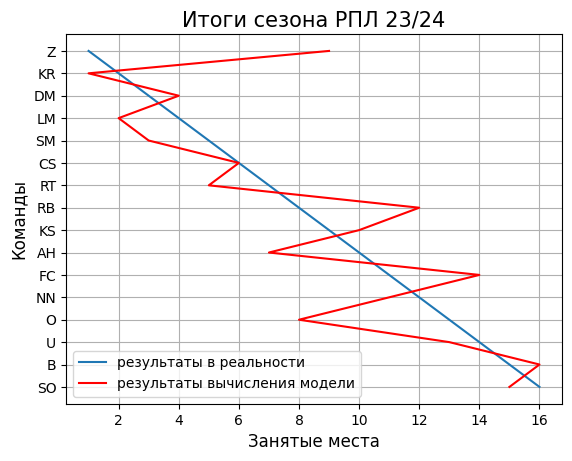

In [217]:
import matplotlib.pyplot as plt

teams = ['Z', 'KR', 'DM', 'LM', 'SM', 'CS', 'RT', 'RB', 'KS', 'AH', 'FC', 'NN', 'O', 'U', 'B', 'SO'][::-1]
plt.plot(list(range(1, 17))[::-1], teams, label='результаты в реальности')
plt.plot([9, 1, 4, 2, 3, 6, 5, 12, 10, 7, 14, 11, 8, 13, 16, 15][::-1], teams, label='результаты вычисления модели', color="red")
plt.grid(True)
plt.legend()
plt.title('Итоги сезона РПЛ 23/24', fontsize=15)
plt.ylabel('Команды', fontsize=12)
plt.xlabel('Занятые места', fontsize=12)